In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# downlload "Irises" from datasets
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
# convert to DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
# iris_df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

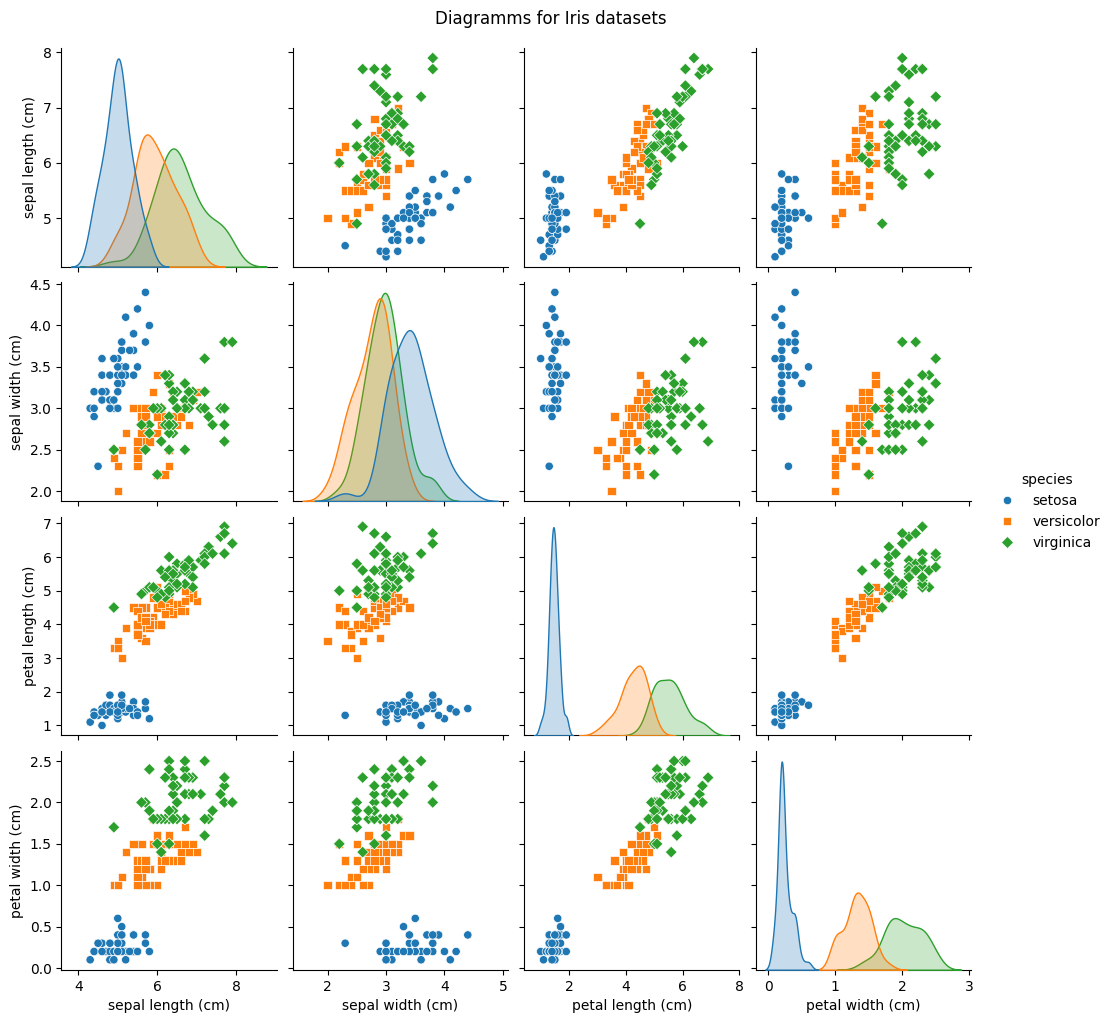

In [21]:
# Creation of diagramms
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Diagramms for Iris datasets', y=1.02)
plt.show()

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split

data_x = [(4.9, 3.3), (5.6, 4.5), (6.4, 4.3), (6.7, 5.7), (6.3, 5.0), (5.2, 3.9), (5.5, 3.7), (5.6, 3.6), (5.5, 3.8), (6.1, 4.7), (7.4, 6.1), (6.0, 5.1), (5.5, 4.4), (5.9, 5.1), (6.5, 5.8), (6.5, 4.6), (6.7, 4.4), (6.3, 5.6), (5.9, 4.8), (6.0, 4.5), (5.6, 4.1), (5.6, 4.9), (4.9, 4.5), (6.2, 4.5), (6.1, 4.7), (6.1, 4.9), (6.2, 5.4), (5.7, 4.2), (6.1, 5.6), (5.8, 4.0), (6.6, 4.6), (5.6, 4.2), (7.2, 6.1), (7.7, 6.7), (5.6, 3.9), (7.7, 6.9), (6.0, 4.0), (6.1, 4.0), (7.6, 6.6), (5.1, 3.0), (6.3, 6.0), (6.7, 5.7), (6.8, 5.9), (6.4, 5.5), (7.0, 4.7), (5.8, 5.1), (5.8, 5.1), (6.4, 5.3), (6.3, 4.9), (6.4, 5.3), (5.7, 3.5), (7.2, 5.8), (6.4, 5.6), (5.7, 4.5), (6.0, 4.5), (7.7, 6.1), (6.2, 4.3), (7.1, 5.9), (7.3, 6.3), (5.0, 3.3), (6.3, 5.1), (5.8, 3.9), (6.4, 4.5), (6.3, 5.6), (6.8, 5.5), (6.9, 5.4), (5.5, 4.0), (5.7, 4.1), (6.5, 5.5), (6.3, 4.7), (5.0, 3.5), (6.7, 5.8), (6.9, 4.9), (7.7, 6.7), (5.8, 4.1), (6.4, 5.6), (6.7, 5.2), (6.7, 4.7), (5.4, 4.5), (6.8, 4.8), (5.7, 4.2), (5.5, 4.0), (6.3, 4.9), (6.5, 5.2), (5.8, 5.1), (6.0, 4.8), (6.2, 4.8), (6.5, 5.1), (7.9, 6.4), (6.7, 5.0), (6.7, 5.6), (6.0, 5.0), (6.1, 4.6), (5.7, 5.0), (7.2, 6.0), (6.3, 4.4), (5.9, 4.2), (6.9, 5.1), (6.6, 4.4), (6.9, 5.7)]
data_y = [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1]

data_x = np.array(data_x)
data_y = np.array(data_y)

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

def ro(x1, x2, w=None, p=1):
    if w is None:
        w = np.ones(len(x1))
    return (sum([w * abs(xk - xm) ** p for w, xk, xm in zip(w, x1, x2)])) ** (1/p)

k = 5 # num of neighborhoods
predict = []
for x in x_test: 
    neighs = sorted([[ro(x, x1), y] for x1, y in zip(x_train, y_train)], key=lambda x: x[0])[:k]
    predict.append(1 if sum([x[1] for x in neighs]) > 0 else -1)

Q = sum(predict!=y_test)
Q

np.int64(2)

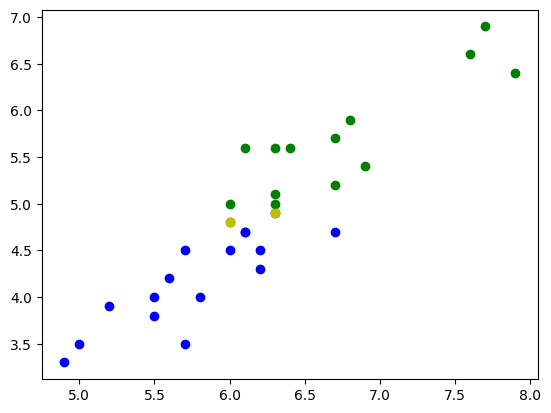

In [47]:
# lets check quality with plots
import matplotlib.pyplot as plt
colors = ['b', 'g', 'y', 'r']
markers = ['0', 'd', 'x', 'x']
labels = ['class 0', 'class 1', 'errors']
plt.scatter(x_test[y_test==-1, 0], x_test[y_test==-1, 1], c=colors[0], label=labels[0])
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], c=colors[1], label=labels[1])
plt.scatter(x_test[y_test!=predict, 0], x_test[y_test!=predict, 1], c=colors[2], label=labels[2])
# plt.scatter(x_test[y_test!=predict & y_test==1, 0], x_test[y_test!=predict & y_test==1, 1], c=colors[3], label=labels[3])
# plt.scatter(data_x[:, 0], 

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats as st

np.random.seed(0)
n_feature = 5 # количество признаков

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 7, -2, 4, 6]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * 0.5
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r3 = -0.7
D3 = 1.0
mean3 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * -0.5
V3 = [[D3 * r3 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2, N3 = 100, 120, 90
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T
x3 = np.random.multivariate_normal(mean3, V3, N3).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N1), np.ones(N2), np.ones(N3) * 2])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

def ro(x1, x2):
    return np.sum((x1 - x2) ** 2, axis=0)



k = 5

predict = []
for x in x_test:
    # определяем соседей по расстоянию кортежем (distance, neigh_target) и сортируем по расстоянию
    neighs = np.array(sorted([(ro(x, x1), y) for x1, y in zip(x_train, y_train)], key=lambda x: x[0]))
    # в предикт вносим самый "популярный" класс среди классов 5и ближайших элементов
    predict.append(st.mode(neighs[:k, 1])[0])

Q = np.mean(predict!=y_test)
Q

np.float64(0.16129032258064516)

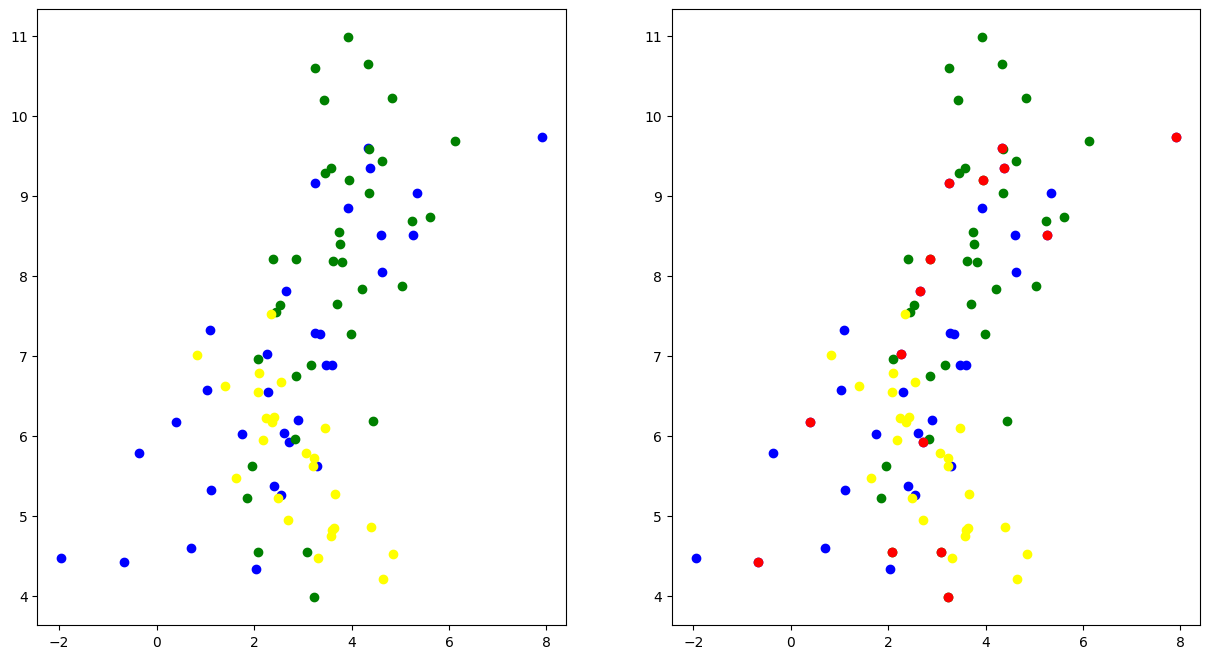

In [100]:

colors = ['b', 'g', 'yellow', 'r']
markers = ['0', 'd', 's', 'x']
labels = ['class 0', 'class 1', 'class 2', 'errors']

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
for j in [0,1]:
    for i in range(3):
        axes[j].scatter(x_test[y_test==i, 0], x_test[y_test==i, 1], c=colors[i], label=labels[i])


axes[1].scatter(x_test[y_test!=predict, 0], x_test[y_test!=predict, 1], c=colors[-1], label=labels[-1])
